In [ ]:
pip install openjdk

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement openjdk (from versions: none)
ERROR: No matching distribution found for openjdk


In [ ]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.  Building wheel for pyspark (setup.py): finished with status 'done'
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425383 sha256=5fdda2bf1e6d0c0644a15e37842755c2a077810e3bd113af27524dfc42920398
  Stored in directory: c:\users\cg-stats-pc58\appdata\local\pip\cache\wheels\57\bd\14\ce9e21f2649298678d011fb8f71ed38ee70b42b94fef0be142
Successfully built pyspark



In [ ]:
pip install findspark

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import findspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Dataframe').getOrCreate()

In [ ]:
df = spark.read.option('header','true').csv(r'C:\Users\CG-STATS-PC58\Downloads\titanic.csv')

In [ ]:
df.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Survived: string (nullable = true)
 |-- Pclass: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: string (nullable = true)
 |-- Parch: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [ ]:
df1=spark.read.csv(r'C:\Users\CG-STATS-PC58\Downloads\titanic.csv',header=True,inferSchema=True)

In [ ]:
df1.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [ ]:
df1.select('Name')

DataFrame[Name: string]

In [ ]:
df1.select('Name').show()

+--------------------+
|                Name|
+--------------------+
|Braund, Mr. Owen ...|
|Cumings, Mrs. Joh...|
|Heikkinen, Miss. ...|
|Futrelle, Mrs. Ja...|
|Allen, Mr. Willia...|
|    Moran, Mr. James|
|McCarthy, Mr. Tim...|
|Palsson, Master. ...|
|Johnson, Mrs. Osc...|
|Nasser, Mrs. Nich...|
|Sandstrom, Miss. ...|
|Bonnell, Miss. El...|
|Saundercock, Mr. ...|
|Andersson, Mr. An...|
|Vestrom, Miss. Hu...|
|Hewlett, Mrs. (Ma...|
|Rice, Master. Eugene|
|Williams, Mr. Cha...|
|Vander Planke, Mr...|
|Masselmani, Mrs. ...|
+--------------------+
only showing top 20 rows



In [ ]:
df1.select(['Name','Age']).show()

+--------------------+----+
|                Name| Age|
+--------------------+----+
|Braund, Mr. Owen ...|22.0|
|Cumings, Mrs. Joh...|38.0|
|Heikkinen, Miss. ...|26.0|
|Futrelle, Mrs. Ja...|35.0|
|Allen, Mr. Willia...|35.0|
|    Moran, Mr. James|NULL|
|McCarthy, Mr. Tim...|54.0|
|Palsson, Master. ...| 2.0|
|Johnson, Mrs. Osc...|27.0|
|Nasser, Mrs. Nich...|14.0|
|Sandstrom, Miss. ...| 4.0|
|Bonnell, Miss. El...|58.0|
|Saundercock, Mr. ...|20.0|
|Andersson, Mr. An...|39.0|
|Vestrom, Miss. Hu...|14.0|
|Hewlett, Mrs. (Ma...|55.0|
|Rice, Master. Eugene| 2.0|
|Williams, Mr. Cha...|NULL|
|Vander Planke, Mr...|31.0|
|Masselmani, Mrs. ...|NULL|
+--------------------+----+
only showing top 20 rows



In [ ]:
df1.dtypes

[('PassengerId', 'int'),
 ('Survived', 'int'),
 ('Pclass', 'int'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'double'),
 ('SibSp', 'int'),
 ('Parch', 'int'),
 ('Ticket', 'string'),
 ('Fare', 'double'),
 ('Cabin', 'string'),
 ('Embarked', 'string')]

In [ ]:
df1.describe().show()

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                NULL|  NULL| 29.69911764705882|0.5230078563411896|0.38159371492704824|260318.54916792738| 32.20420

In [ ]:
df1=df1.withColumn('ageafter2years',df1['Age']+2)

In [ ]:
df1.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|ageafter2years|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|          24.0|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|          40.0|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|          28.0|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|          37.0|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450

In [ ]:
df1=df1.drop('ageafter2years')

In [ ]:
df1.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      

In [ ]:
df1=df1.withColumnRenamed('Name','FullName')

In [ ]:
df1.columns

['PassengerId',
 'Survived',
 'Pclass',
 'FullName',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
df1.filter(df1.Age == 50).show()

+-----------+--------+------+--------------------+------+----+-----+-----+------------+--------+-------+--------+
|PassengerId|Survived|Pclass|            FullName|   Sex| Age|SibSp|Parch|      Ticket|    Fare|  Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+------------+--------+-------+--------+
|        178|       0|     1|Isham, Miss. Ann ...|female|50.0|    0|    0|    PC 17595| 28.7125|    C49|       C|
|        260|       1|     2|Parrish, Mrs. (Lu...|female|50.0|    0|    1|      230433|    26.0|   NULL|       S|
|        300|       1|     1|Baxter, Mrs. Jame...|female|50.0|    0|    1|    PC 17558|247.5208|B58 B60|       C|
|        435|       0|     1|Silvey, Mr. Willi...|  male|50.0|    1|    0|       13507|    55.9|    E44|       S|
|        459|       1|     2| Toomey, Miss. Ellen|female|50.0|    0|    0|F.C.C. 13531|    10.5|   NULL|       S|
|        483|       0|     3|Rouse, Mr. Richar...|  male|50.0|    0|    0|    A/5 3594| 

In [ ]:
df1.filter(df1.Age != 50).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|            FullName|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|      

In [ ]:
df1.filter(df1.Pclass == 1).select(['Pclass','FullName']).show()

+------+--------------------+
|Pclass|            FullName|
+------+--------------------+
|     1|Cumings, Mrs. Joh...|
|     1|Futrelle, Mrs. Ja...|
|     1|McCarthy, Mr. Tim...|
|     1|Bonnell, Miss. El...|
|     1|Sloper, Mr. Willi...|
|     1|Fortune, Mr. Char...|
|     1|Uruchurtu, Don. M...|
|     1|Spencer, Mrs. Wil...|
|     1|Meyer, Mr. Edgar ...|
|     1|Holverson, Mr. Al...|
|     1|Harper, Mrs. Henr...|
|     1|Ostby, Mr. Engelh...|
|     1|   Woolner, Mr. Hugh|
|     1| Icard, Miss. Amelie|
|     1|Harris, Mr. Henry...|
|     1|Stewart, Mr. Albe...|
|     1|Carrau, Mr. Franc...|
|     1|Fortune, Miss. Ma...|
|     1|Chaffee, Mr. Herb...|
|     1|Goldschmidt, Mr. ...|
+------+--------------------+
only showing top 20 rows



In [ ]:
#
df1.filter((df1.Age>50) & (df1.Embarked != 'c')).show().

+-----------+--------+------+--------------------+------+----+-----+-----+-----------+--------+-----+--------+
|PassengerId|Survived|Pclass|            FullName|   Sex| Age|SibSp|Parch|     Ticket|    Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+-----------+--------+-----+--------+
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|      17463| 51.8625|  E46|       S|
|         12|       1|     1|Bonnell, Miss. El...|female|58.0|    0|    0|     113783|   26.55| C103|       S|
|         16|       1|     2|Hewlett, Mrs. (Ma...|female|55.0|    0|    0|     248706|    16.0| NULL|       S|
|         34|       0|     2|Wheadon, Mr. Edwa...|  male|66.0|    0|    0| C.A. 24579|    10.5| NULL|       S|
|         55|       0|     1|Ostby, Mr. Engelh...|  male|65.0|    0|    1|     113509| 61.9792|  B30|       C|
|         95|       0|     3|   Coxon, Mr. Daniel|  male|59.0|    0|    0|     364500|    7.25| NULL|       S|
|

In [ ]:
df1.filter((df1.Age != 50) & ((df1.Embarked != 'C'))).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|            FullName|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|           17463|51.8625|  E46|       S|
|          8|       0|     3|Palsson, Master. ...|  male| 2.0|    3|    1|      

In [ ]:
df1.filter(df1.FullName.rlike("(?i)^*Rice$")).show()

+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+-----+--------+
|PassengerId|Survived|Pclass|            FullName|   Sex| Age|SibSp|Parch|  Ticket|    Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+-----+--------+
|        326|       1|     1|Young, Miss. Mari...|female|36.0|    0|    0|PC 17760|135.6333|  C32|       C|
|        460|       0|     3|O'Connor, Mr. Mau...|  male|NULL|    0|    0|  371060|    7.75| NULL|       Q|
|        724|       0|     2|Hodges, Mr. Henry...|  male|50.0|    0|    0|  250643|    13.0| NULL|       S|
|        838|       0|     3| Sirota, Mr. Maurice|  male|NULL|    0|    0|  392092|    8.05| NULL|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+-----+--------+



In [ ]:
li=["Rice","Nicola"]
df1.filter(~df1.FullName.isin(li)).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|            FullName|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      

In [ ]:
df1.createOrReplaceTempView("titanic")

In [ ]:
spark.sql("select FullName from titanic").show()

+--------------------+
|            FullName|
+--------------------+
|Braund, Mr. Owen ...|
|Cumings, Mrs. Joh...|
|Heikkinen, Miss. ...|
|Futrelle, Mrs. Ja...|
|Allen, Mr. Willia...|
|    Moran, Mr. James|
|McCarthy, Mr. Tim...|
|Palsson, Master. ...|
|Johnson, Mrs. Osc...|
|Nasser, Mrs. Nich...|
|Sandstrom, Miss. ...|
|Bonnell, Miss. El...|
|Saundercock, Mr. ...|
|Andersson, Mr. An...|
|Vestrom, Miss. Hu...|
|Hewlett, Mrs. (Ma...|
|Rice, Master. Eugene|
|Williams, Mr. Cha...|
|Vander Planke, Mr...|
|Masselmani, Mrs. ...|
+--------------------+
only showing top 20 rows



In [ ]:
#the name and class of the people who didtnt survive & where travelling in second class

In [ ]:
spark.sql("select FullName,Pclass from titanic where Pclass =2 & Survived = '0'").show()

+--------------------+------+
|            FullName|Pclass|
+--------------------+------+
|Braund, Mr. Owen ...|     3|
|Cumings, Mrs. Joh...|     1|
|Heikkinen, Miss. ...|     3|
|Futrelle, Mrs. Ja...|     1|
|Allen, Mr. Willia...|     3|
|    Moran, Mr. James|     3|
|McCarthy, Mr. Tim...|     1|
|Palsson, Master. ...|     3|
|Johnson, Mrs. Osc...|     3|
|Nasser, Mrs. Nich...|     2|
|Sandstrom, Miss. ...|     3|
|Bonnell, Miss. El...|     1|
|Saundercock, Mr. ...|     3|
|Andersson, Mr. An...|     3|
|Vestrom, Miss. Hu...|     3|
|Hewlett, Mrs. (Ma...|     2|
|Rice, Master. Eugene|     3|
|Williams, Mr. Cha...|     2|
|Vander Planke, Mr...|     3|
|Masselmani, Mrs. ...|     3|
+--------------------+------+
only showing top 20 rows



In [ ]:
#u have to tell every class how many people travel

In [ ]:
spark.sql('select count(Pclass),Pclass from titanic group by Pclass').show()

+-------------+------+
|count(Pclass)|Pclass|
+-------------+------+
|          216|     1|
|          491|     3|
|          184|     2|
+-------------+------+



In [ ]:
spark.sql('select Pclass,count(survived) from titanic where survived = 1 group by Pclass order by Pclass').show()

+------+---------------+
|Pclass|count(survived)|
+------+---------------+
|     1|            136|
|     2|             87|
|     3|            119|
+------+---------------+



In [ ]:
spark.sql('select avg(Age)from titanic where survived = 0').show()

+-----------------+
|         avg(Age)|
+-----------------+
|30.62617924528302|
+-----------------+



In [ ]:
spark.sql("select count(FullName) from titanic where FullName like'%Major%'" ).show()

+---------------+
|count(FullName)|
+---------------+
|              2|
+---------------+



In [ ]:
spark.sql("select count(FullName) from titanic where Sibsp = 0 & Parch = 0").show()

+---------------+
|count(FullName)|
+---------------+
|            283|
+---------------+



In [ ]:
spark.sql("select FullName,Age from titanic where Pclass = 2 and age >(select avg(age) from titanic where Pclass = 2)").show()

+--------------------+----+
|            FullName| Age|
+--------------------+----+
|Hewlett, Mrs. (Ma...|55.0|
|Fynney, Mr. Joseph J|35.0|
|Beesley, Mr. Lawr...|34.0|
|Wheadon, Mr. Edwa...|66.0|
|Jenkin, Mr. Steph...|32.0|
|Doling, Mrs. John...|34.0|
|   Kantor, Mr. Sinai|34.0|
|Nasser, Mr. Nicholas|32.5|
| Webber, Miss. Susan|32.5|
|"Navratil, Mr. Mi...|36.5|
|Byles, Rev. Thoma...|42.0|
|Bateman, Rev. Rob...|51.0|
|"Watt, Mrs. James...|40.0|
|  Hale, Mr. Reginald|30.0|
| Pinsky, Mrs. (Rosa)|32.0|
|Cameron, Miss. Cl...|35.0|
|Givard, Mr. Hans ...|30.0|
|Jacobsohn, Mr. Si...|42.0|
|  Harris, Mr. Walter|30.0|
|Sjostedt, Mr. Ern...|59.0|
+--------------------+----+
only showing top 20 rows



In [ ]:
spark.sql("select FullName,Age,Survived from titanic where Embarked = 'C' and Pclass !=3 and Survived = 1 ").show()

+--------------------+----+--------+
|            FullName| Age|Survived|
+--------------------+----+--------+
|Cumings, Mrs. Joh...|38.0|       1|
|Nasser, Mrs. Nich...|14.0|       1|
|Spencer, Mrs. Wil...|NULL|       1|
|Laroche, Miss. Si...| 3.0|       1|
|Harper, Mrs. Henr...|49.0|       1|
|Greenfield, Mr. W...|23.0|       1|
|Brown, Mrs. James...|44.0|       1|
|Lurette, Miss. Elise|58.0|       1|
|    Blank, Mr. Henry|40.0|       1|
|Newell, Miss. Mad...|31.0|       1|
|Bazzani, Miss. Al...|32.0|       1|
|Thorne, Mrs. Gert...|NULL|       1|
|    Ward, Miss. Anna|35.0|       1|
|Bishop, Mrs. Dick...|19.0|       1|
|Baxter, Mrs. Jame...|50.0|       1|
|Fleming, Miss. Ma...|NULL|       1|
|Penasco y Castell...|17.0|       1|
|Francatelli, Miss...|30.0|       1|
|Hays, Miss. Marga...|24.0|       1|
|Ryerson, Miss. Em...|18.0|       1|
+--------------------+----+--------+
only showing top 20 rows



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 =df1.toPandas()

In [ ]:
df1.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

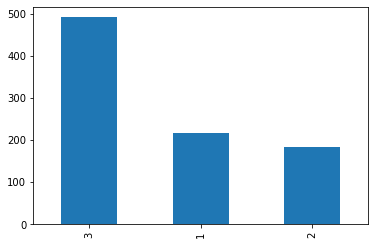

In [ ]:
df1.Pclass.value_counts().plot(kind='bar')

In [ ]:
df1[['']]

<AxesSubplot:>

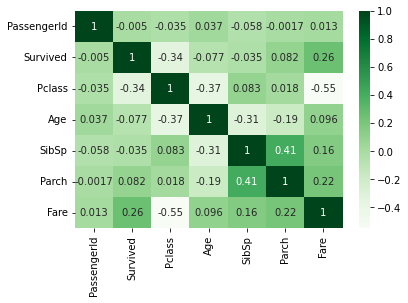

In [ ]:
sns.heatmap(df1.corr(),cmap='Greens',annot=True)

In [ ]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
FullName         0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df1.Embarked.mode()[0]

'S'

In [ ]:
import pandas as pd
for i,data in df1.iterrows():
    if pd.isnull(data['Embarked']):
        df1.at[i,'Embarked']=modeval

In [ ]:
import random

In [ ]:
df1

create table titanic(PassengerId int,Survived int,Pclass int,Name
varchar(100),Sex varchar(10),Age int,SibSp int,Parch int,Ticket varchar(50),Fare
decimal(10,2),Cabin varchar(10),Embarked varchar(10));
